# Einführung

In den vergangenen Lektionen konntest du einen Einblick in neuronale Netzwerke gewinnen. Du hast dabei verschiedene Aspekte kennengelernt.

Zum Abschluss unseres DeepLearning Exkurses möchten wir das Gelernte an einem praxisnäheren Beispiel vertiefen. Dazu soll ein Programm geschrieben werden, welches Kleidungsstücke kategoriserien kann. Um unser Modell zu trainieren  nutzen wir eine Datenbank von 60'000 Schwarzweiss Bildern, welche 28x28 Pixel gross sind. Für das Testen unseres Modells stehen weitere 10'000 Bilder zur Verfügung. Die Daten wurden von Zalando bereitgestellt und sehen wie folgt aus:

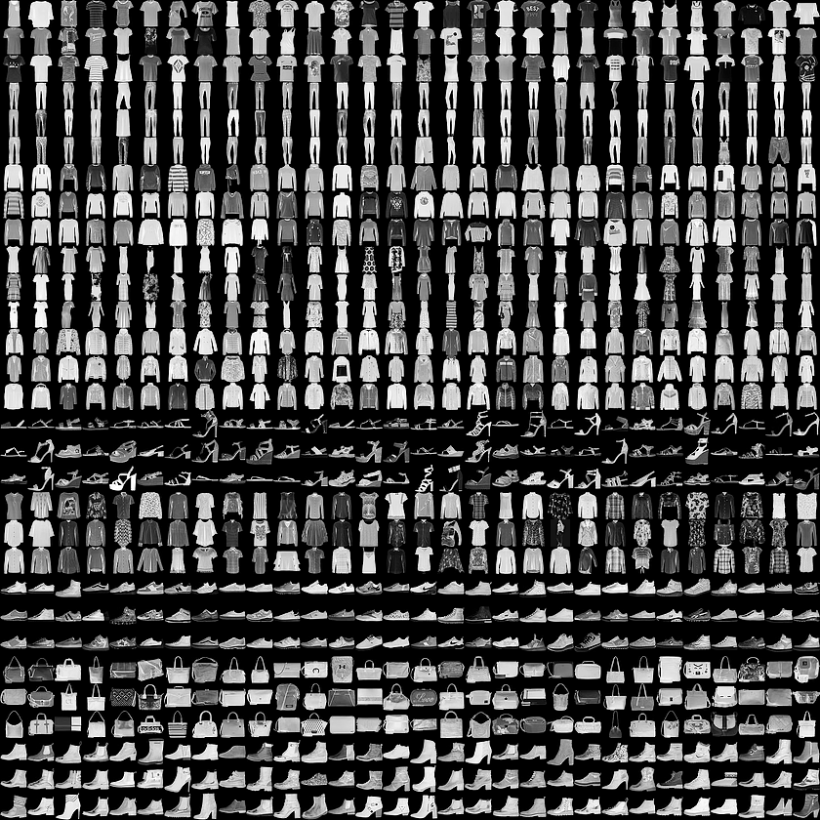

Die Kleidungsstücke sind in 10 Kategorien eingeteilt:

0.   T-Shirt / Top
1.   Hosen
2.   Pullover
3.   Kleid
4.   Mantel
5.   Sandalen
6.   Hemd
7.   Turnschuhe (Sneaker)
8.   Tasche
9.   Damenstiefel

Unser Ziel ist es ein Modell zu entwickeln, welches eine Treffsicherheit (accuracy) von über 92% aufweist. Wir haben bereits gelernt, dass Convolutional Neural Networks für Bildanalyse am vielversprechendsten sind.

### Übung

Weshalb sind Convolutional Neural Networks (kurz CNN) die geeignete Wahl bei der Analyse von Bildern?


# Baseline Modell

Wir starten zu Beginn nicht mit den CNN sondern verwenden ein sehr einfaches Modell. 10 Neuronen (Gleiche Anzahl wie Anzahl Klassen) und 1 Layer. Von da aus versuchen wir unser Modell zu verbessern.
Im nächsten Abschnitt werden wir dann auf CNN wechseln um noch ein paar Prozente mehr herauszuholen.

## Vorbereitung

Folgender Code wird benötigt um das Datenset in die korrekte Form zu bringen und das Modell später zu überprüfen. Dazu haben wir einige Funktionen bereits geschrieben, so dass du dich auf die Implementierung des Modells konzentrieren kannst. Die Kommentare im Code helfen dir den Code etwas zu verstehen. 

Du musst aber nicht jede Zeile verstehen um das Model entwickeln zu können.

In [ ]:
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

def load_dataset():
  # Funktion welches das Datenset herunterlädt
  (trainX, trainY), (testX, testY) = fashion_mnist.load_data()
	# Num_pixels gibt an wie viele Elemente es gibt (bei 28 * 28 Pixel sind dies 784 Elemente)
  num_pixels = trainX.shape[1] * trainX.shape[2]
  #Das Datenset wird als 1 Vektor (bei Tensorflow ist dies 1 Tensor mit einer Dimension) geschrieben
  trainX = trainX.reshape((trainX.shape[0], num_pixels))
  testX = testX.reshape((testX.shape[0],num_pixels))
  # Eine Form der Klassifizierung, anstatt 0, 1, 2, 3 etc als Klasse zu haben ist es
  # ein Vektor der Länge 10, wo jeweils alle Elemente 0 sind und nur ein Element den Wert 1 hat:
  # 0 0 0 0 0 0 0 0 0 1 ist eine Klasse
  # 0 0 0 0 0 0 0 0 1 0 ist eine andere Klasse
  trainY = to_categorical(trainY)
  testY = to_categorical(testY)
  return trainX, trainY, testX, testY,num_pixels


def prep_pixels(train, test):
	# Wird zuerst in einen Float konvertiert
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# Die Pixel haben einen Wert zwischen 0 und 255 (Grauwert) und sollen normiert werden
  # so dass sie einen Wert zwischen 0 und 1 haben
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	return train_norm, test_norm

## Entwickeln des Modells

Nun möchten wir unser erstes einfaches Modell erstellen. 

Dieses einfache Modell besteht aus einem Layer und 10 Neuronen. Es werden 10 Neuronen verwendet um die Klassifizierung auf die 10 verschiedenen Klassen machen zu können. Aus dem 28x28 Schwarzweiss Bild wurde ein Tensor mit einer Dimension mit 28 * 28 * 1 = 784 Elementen. Als Aktivierungsfunktion wird die uns bekannte *Relu* genommen.
Wir verwenden einen *Dense* Layer. Dies bedeutet, dass falls man mehrere Layers hat, dass jedes Neuron des vorigen Layers mit jedem Neuron des nachfolgenden Layers verbunden ist.
Danach wird das Model mit der *compile* Methode konfiguriert. In unserem Fall verwenden wir als Optimierung der Gewichte die Adams Funktion. Die Erklärung was diese Funktion genau macht würde den Rahmen unseres Exkurses sprengen. Nur so viel: Es sorgt dafür dass die Gewichte (weights) optimiert werden. Die Loss Funktion ist diejenige, welche minimiert werden soll. In diesem Fall möchten wir die falschen Klassifizierungen minimieren. Metric bedeutet nach welchem Wert wir das Modell bewerten. Wir möchten eine möglichst hohe Genauigkeit erreichen.

Der folgende Code soll der Ausgangspunkt sein, er wurde bereits in den ausführbaren Abschnitt kopiert. Du kannst ihn ausführen und verändern und optimieren. Spiel ruhig ein wenig damit herum. Du kannst dein Modell jederzeit testen. Dazu springst du einfach zum Abschnitt **Testen des Modells**

```
# define baseline model
def baseline_model(num_pixels,num_classes):
    model = Sequential()
    model.add(Dense(num_classes, input_dim =num_pixels , kernel_initializer='normal', activation='relu'))
	# konfigurieren des Modells
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
```



In [29]:
# define baseline model
def baseline_model(num_pixels,num_classes):
    model = Sequential()
    model.add(Dense(300, input_dim =num_pixels , kernel_initializer='normal', activation='relu'))
    model.add(Dense(300, kernel_initializer='normal', activation='relu'))
    model.add(Dense(300, kernel_initializer='normal', activation='relu'))
    model.add(Dense(10, kernel_initializer='normal', activation='softmax'))   
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

Erweitere nun das Modell, damit es funktioniert und eine bessere Genauigkeit erzielt. Du kannst beispielsweise weitere Layers hinzufügen.

Hinweis:
Um mehr als zwei Klassen unterscheiden zu können empfiehlt es sich im letzten Layer die *softmax* Funktion als Aktivierungsfunktion zu verwenden.
Zudem brauchst du die input Dimension nur beim ersten Layer anzugeben.

Falls du nicht weiterkommst kannst du im Abschnitt **Tipps und Hinweise** noch weitere Tipps anschauen um dein Modell zu verbessern. 


## Testen des Modells

Sobald du mit deinem Modell zufrieden bist und es ausgeführt hast, kannst du es mit untenstehendem Code testen. 

Der Code lädt als erstes das Datenset und bringt die Daten in eine geeignete Form für die Modellierung. 
Die *fit* Methode trainiert das Modell mit den Trainingsdaten und optimiert die Gewichte. Als Parameter gibt man die Trainingsdaten und Testdaten mit. *epochs* gibt an, wie oft man das Modell mit den gesamten Trainingsdaten trainiert. *batch-size* gibt an mit wie vielen Daten trainiert wird bevor die Gewichte angepasst und optimiert werden. Du kannst auch mit diesen beiden Parametern experimentieren. 

Was hat es für einen Einfluss auf das Ergebnis?

Zum Schluss wird mit evaluate das optimierte Modell nochmals getestet und angegeben wie viel % der Bilder falsch klassifiziert wurden. 

In [31]:
# laden des Datensets
trainX, trainY, testX, testY, num_pixels = load_dataset()
# Normierung
trainX, testX = prep_pixels(trainX, testX)
num_classes = testY.shape[1]
# erstellen des Modells
model = baseline_model(num_pixels,num_classes)
# Trainieren des Modells
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=10, batch_size=200)
# Evaluierung des Modells
scores = model.evaluate(testX, testY, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/20
120/120 [==============================] - 4s 29ms/step - loss: 0.9126 - accuracy: 0.7004 - val_loss: 0.4782 - val_accuracy: 0.8310
Epoch 2/20
120/120 [==============================] - 3s 28ms/step - loss: 0.4114 - accuracy: 0.8528 - val_loss: 0.4291 - val_accuracy: 0.8433
Epoch 3/20
120/120 [==============================] - 3s 28ms/step - loss: 0.3638 - accuracy: 0.8698 - val_loss: 0.3633 - val_accuracy: 0.8700
Epoch 4/20
120/120 [==============================] - 3s 28ms/step - loss: 0.3230 - accuracy: 0.8822 - val_loss: 0.3708 - val_accuracy: 0.8680
Epoch 5/20
120/120 [==============================] - 3s 28ms/step - loss: 0.2997 - accuracy: 0.8893 - val_loss: 0.3526 - val_accuracy: 0.8710
Epoch 6/20
120/120 [==============================] - 3s 28ms/step - loss: 0.2805 - accuracy: 0.8983 - val_loss: 0.3467 - val_accuracy: 0.8745
Epoch 7/20
120/120 [==============================] - 3s 28ms/step - loss: 0.2662 - accuracy: 0.9018 - val_loss: 0.3424 - val_accuracy: 0.8802

## Zusammenfassung

Mittels eines neuronalen Netzes mit mehreren Layern (also Deep Learning) konnten wir ein Modell erstellen, welches in der Lage ist die Kleidungsstücke einem der zehn Klassen zuzuordnen mit einer Fehlerquote von ca. 10%. Dies ist schon sehr gut.
Du konntest feststellen, dass mit dem Verändern von Parametern und dem Einfügen von zusätzlichen Neuronen und Layers die Genauigkeit des Modells stark variiert. Und mehr ist nicht immer gleich besser.

Eine weitere wichtige Erkenntnis ist, dass es nicht die eine richtige Lösung gibt. Es gibt kein Modell das für verschiedenste Probleme und Daten die beste Lösung ergibt. 


# Convolutional Neural Network

## Vorbereitung

Um das Modell noch mehr zu verbessern sollen nun Convolutionals verwendet werden. Wie du bereits gelernt hast, werden bei Convolutionals die Umgebung der Pixel miteinbezogen. Dies führt dazu, dass auch Merkmale in einem Bild erkennt werden können, was bei der Klassifizierung hilft.

Um unser Modell zu erstellen brauchen wir wieder den Code fürs Erhalten und Modifizieren der Daten.
Der Code ist fast identisch zu vorher, nur werden wir diesmal einen Mehrdimensionalen Tensor haben.



In [32]:
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

def load_dataset_convolutional():
  (trainX, trainY), (testX, testY) = fashion_mnist.load_data()
  #umformen, so dass es nur noch 1 Kanal (Grauwerte) hat und nicht 3 (RGB)
  #28,28 bleibt für die Grösse des Bildes (28x28 Pixel)
  trainX=trainX.reshape(trainX.shape[0],28,28,1)
  testX = testX.reshape(testX.shape[0],28,28,1 )
  # Eine Form der Klassifizierung, anstatt 0, 1, 2, 3 etc als Klasse zu haben ist es
  # ein Vektor der Länge 10, wo jeweils alle Elemente 0 sind und nur ein Element den Wert 1 hat:
  # 0 0 0 0 0 0 0 0 0 1 ist eine Klasse
  # 0 0 0 0 0 0 0 0 1 0 ist eine andere Klasse
  trainY = to_categorical(trainY)
  testY = to_categorical(testY)
  return trainX, trainY, testX, testY

def prep_pixels(train, test):
	# Wird zuerst in einen Float konvertiert
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# Die Pixel haben einen Wert zwischen 0 und 255 (Grauwert) und sollen normiert werden
  # so dass sie einen Wert zwischen 0 und 1 haben
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	return train_norm, test_norm

## Entwickeln des Modells

Nun soll das Modell entwickelt werden. Dazu nutzen wir 2D Convolutionals von Keras.


```
# define cnn model
def cnn_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model
```



In [38]:
# define cnn model
def cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

## Testen des Modells

Nun kannst du auch dieses Modell testen indem du untenstehenden Code ausführst. Du kannst auch den 

In [39]:
# laden des Datensets
trainX, trainY, testX, testY, num_pixels = load_dataset_convolutional()
# Normierung
trainX, testX = prep_pixels(trainX, testX)
# erstellen des Modells
model = cnn_model(num_pixels,num_classes)
# Trainieren des Modells
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=10, batch_size=200)
# Evaluierung des Modells
scores = model.evaluate(testX, testY, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
 27/300 [=>............................] - ETA: 22s - loss: 1.5429 - accuracy: 0.4639

KeyboardInterrupt: ignored

# Zusammenfassung

In diesem Beispiel konntest du neuronale Netzwerke auf ein reales Problem anwenden. Das Ziel war es Bilder von Kleidungsstücken automatisch einer Klasse zuzuordnen. 
Mit Hilfe von Deep Learning und Neuronalen Netzen konnten wir in kurzer Zeit ein Modell kreieren, welches knapp 90% der Bilder korrekt bestimmen konnte.

In einem zweiten Schritt haben wir Convolutional Netzwerke verwendet. Damit konnten wir eine Genauigkeit von ca. 93% erreichen, jedoch auf Kosten von längerem Training.

Es liegt jedoch noch mehr drin. Auf der [Website](https://github.com/zalandoresearch/fashion-mnist) von diesem Beispiel findet sich etwas weiter unten eine Tabelle von verschiedenen Modellen und deren Genauigkeit.
Dabei haben gewisse Modelle sogar ca. 95% Genauigkeit erreicht.

Was auf der Homepage ebenfalls ersichtlich wird ist, dass viele Wege nach Rom führen. Es gibt nicht das eine richtige Modell. 

# Tipps und Hinweise

Hier findest du ein paar Tipps, welche dir weiterhelfen sollten, falls du beim bearbeiten des Modells ein wenig Schwierigkeiten hast. Versuche es zuerst selbst und schaue erst danach in die Tipps.

## Baseline Modell

Die letzte Schicht sollte 10 Neuronen haben damit die Klassifizierung funktioniert. Mit folgender Schit als Abschluss funktioniert es gut.
```
model.add(Dense(10, kernel_initializer='normal', activation='softmax'))   
```
Du kannst dazwischen weitere Schichten hinzufügen. Beispielsweise 

```
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
```

mit 100 Neuronen.

Es ist ebenfalls sinnvoll die Epochen, sowie auch die batch-size zu erhöhen.


## Convolutional Modell